In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load the dataset
df = pd.read_csv('../data/2/capture20110811.binetflow')

In [17]:
# Data Cleaning for EDA
df['StartTime'] = pd.to_datetime(df['StartTime'], errors='coerce')
df['Label'] = df['Label'].apply(lambda x: 1 if 'Botnet' in x else 0)

In [18]:
# Check for missing values
missing_values = df.isnull().sum()

Class distribution

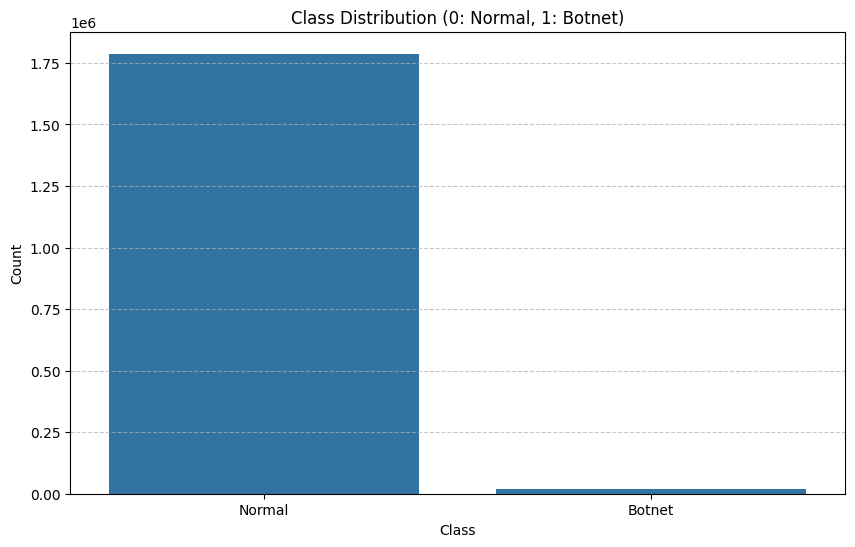

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Label')
plt.title('Class Distribution (0: Normal, 1: Botnet)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Botnet'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('../figures/class_distribution.png', dpi=300)

Distribution of Duration

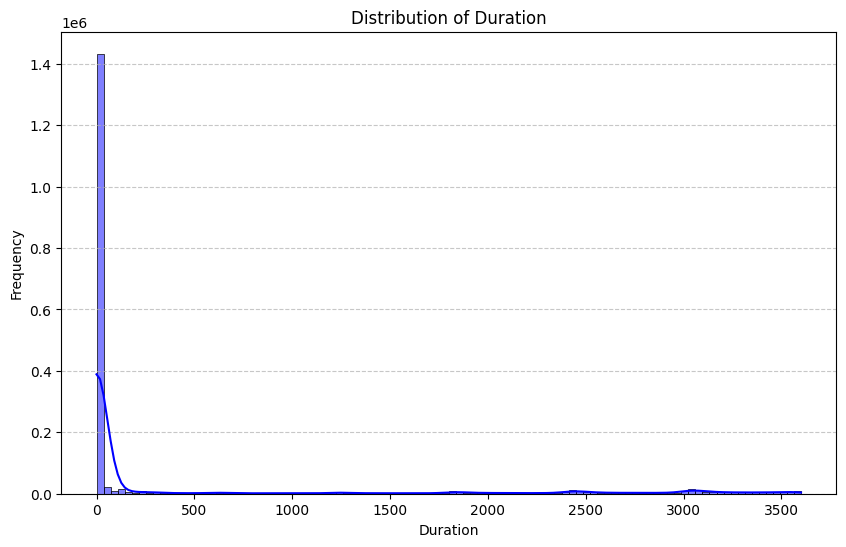

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Dur'], bins=100, kde=True, color='blue')
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('../figures/duration_distribution.png', dpi=300)

Pairwise relationships between numerical features

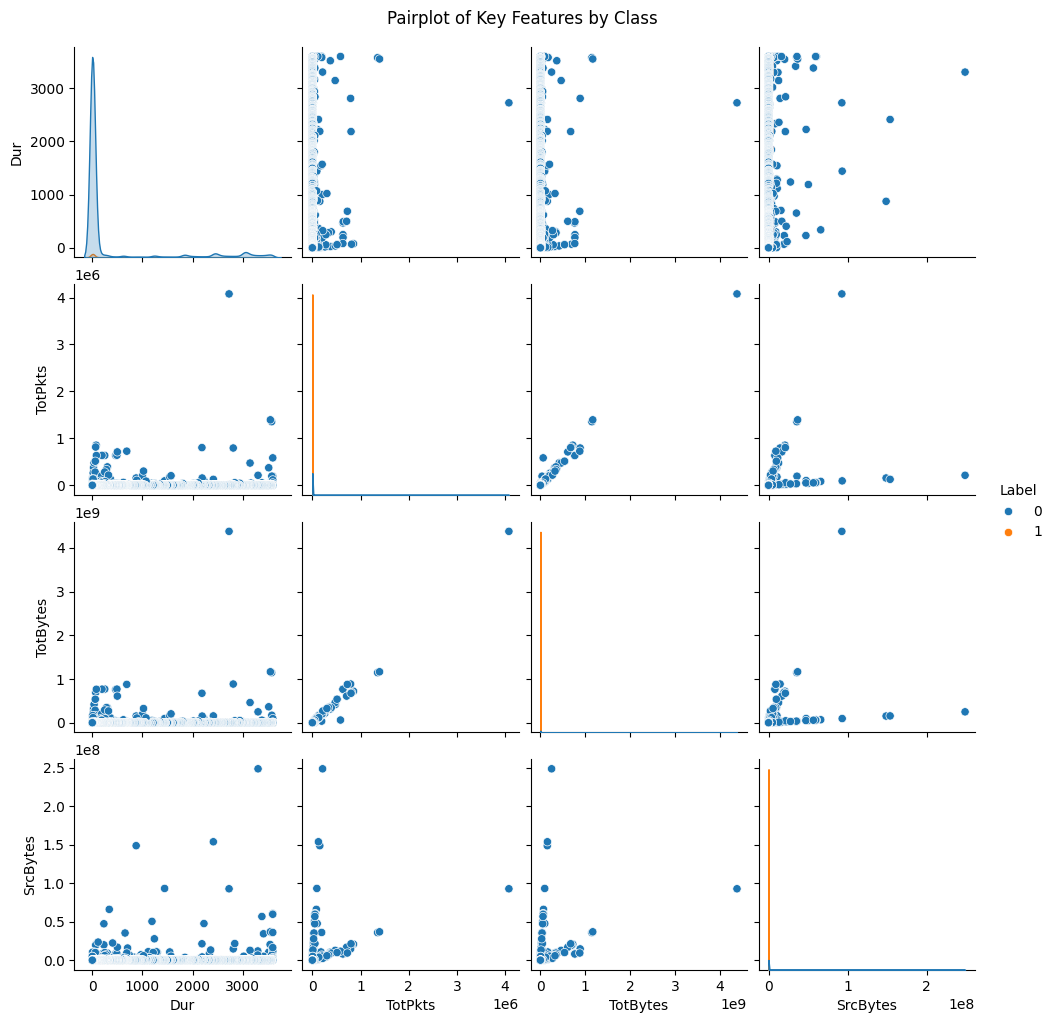

In [22]:
numeric_features = ['Dur', 'TotPkts', 'TotBytes', 'SrcBytes']
sns.pairplot(df[numeric_features + ['Label']], hue='Label', diag_kind='kde')
plt.suptitle('Pairplot of Key Features by Class', y=1.02)
plt.savefig('../figures/pairplot_key_features.png', dpi=300)

Correlation Heatmap

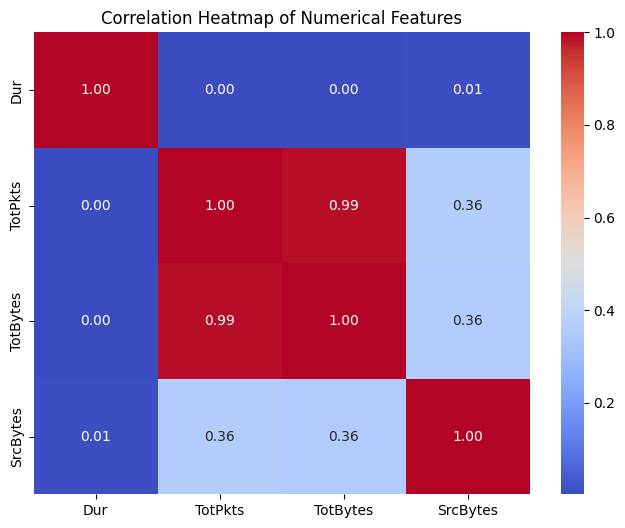

In [23]:
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.savefig('../figures/correlation_heatmap.png', dpi=300)

Boxplot for Numerical Features

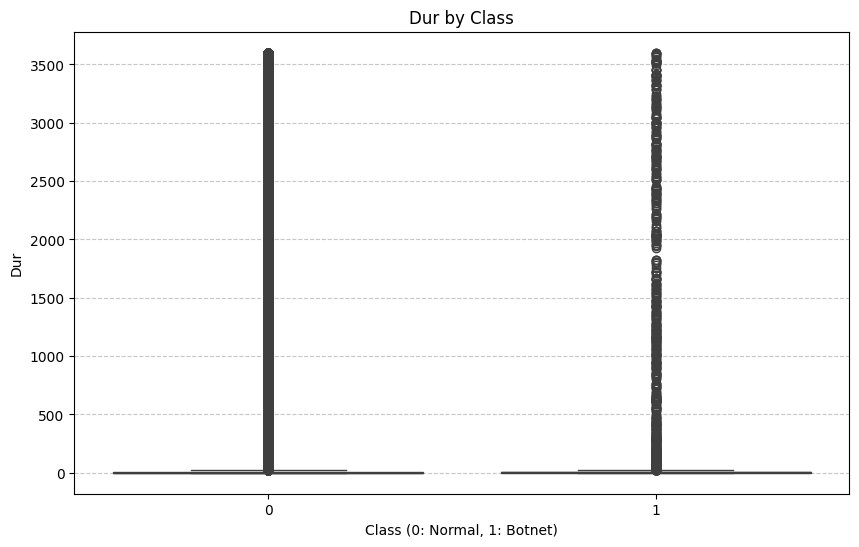

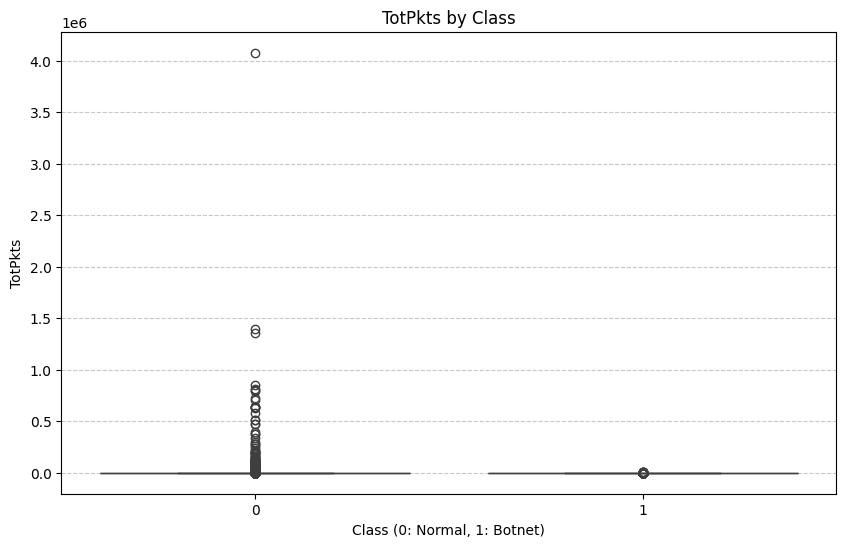

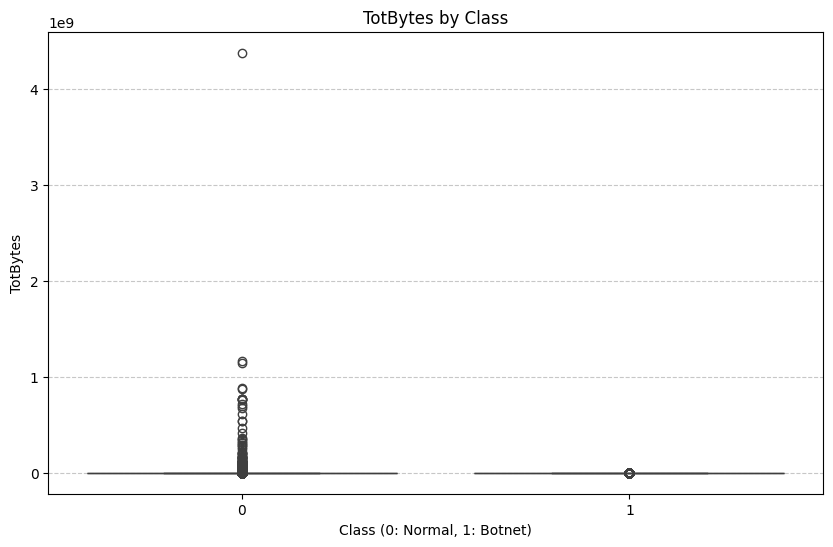

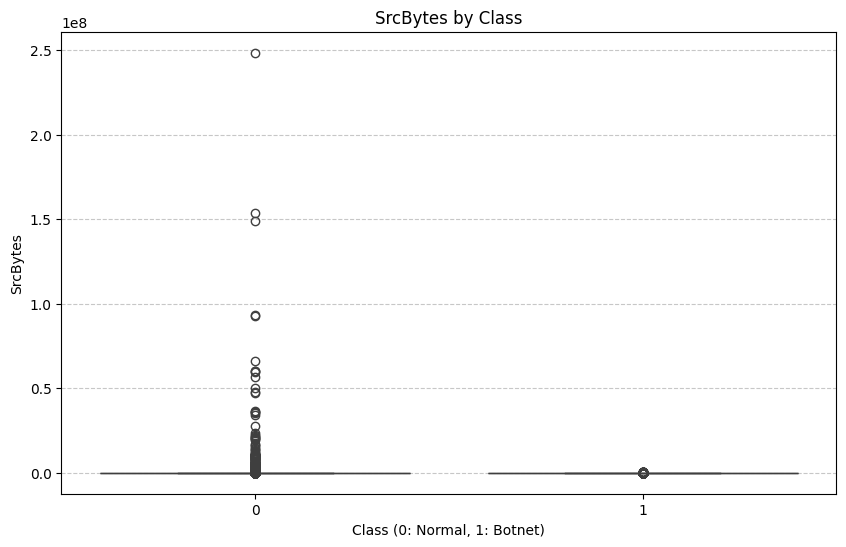

In [24]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Label', y=feature)
    plt.title(f'{feature} by Class')
    plt.xlabel('Class (0: Normal, 1: Botnet)')
    plt.ylabel(feature)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig(f'../figures/boxplot_{feature.lower()}.png', dpi=300)